# <center><b>Financial Fraud Detection<b> </center>

---
# **Table of Contents**
---

**1.** [**Importing Libraries**](#Section1)<br>
**2.** [**Data Acquisition & Description**](#Section2)<br>
  - **2.1** [**Data Description**](#Section21)<br>
  - **2.2** [**Summary Statistics**](#Section22)<br>
  
**3.** [**Data Pre-Profiling**](#Section3)<br>
**4.** [**Exploratory Data Analysis (EDA)**](#Section4)<br>
**5.** [**Applying Decision Tree Classifier**](#Section5)<br>
  - **5.1** [**Data Preparation**](#Section51)<br>
  - **5.2** [**Implementing the model**](#Section52)<br>
  - **5.3** [**Model Evaluation**](#Section53)<br>
  - **5.4** [**Feature Importance**](#Section54)<br>

**6.** [**Conclusion**](#Section6)<br>

---
<a name = Section1></a>
# **1. Importing Libraries**
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import haversine as hs
import re

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier, plot_tree  ## To classify the transactions, and to visualize

from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

---
<a name = Section2></a>
# **2. Data Acquisition & Description**
---
- The Dataset is a synthetic dataset that was generated using the PaySim simulator.

| Records | Features |
| :--: | :--: |
| 6362620 | 11 |

<br>

| # | Feature Name | Feature Description |
|:--:|:--|:--| 
|1| step | Maps a unit of time in the real world. 1 step is 1 hour of time. |
|2| type | Type of transaction. CASH-IN/CASH-OUT/DEBIT/PAYMENT/TRANSFER |
|3| amount |Amount of the transaction in local currency |
|4| nameOrig |	Customer who started the transaction |
|5| oldbalanceOrg |	Initial balance before the transaction |
|6| newbalanceOrig | New balance after the transaction |
|7| nameDest | Customer who is the recipient of the transaction |
|8| oldbalanceDest |	Initial balance recipient before the transaction. **Note that there is not information for customers that start with M (Merchants)**. |
|9| newbalanceDest |	New balance recipient after the transaction. **Note that there is not information for customers that start with M (Merchants)**.|
|10| isFraud |	This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system. |
|11| isFlaggedFraud | The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than **200000** in a single transaction. |

#### Importing the data.

In [2]:
data = pd.read_csv(r"D:\Projects\Financial-fraud-detection\PS_20174392719_1491204439457_log.csv")

In [3]:
data.shape

(6362620, 11)

<a name=Section21></a>
#### **2.1 Data Description**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


<a name=Section22></a>
#### **2.2 Summary Statistics**

In [5]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


<a name=Section3></a>
# **3 Data Pre-profiling**

#### Checking for Missing values.

In [6]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

- We see that there are no missing values.

#### Checking for duplicate values.

In [7]:
data.duplicated().sum()

0

- We see that there are no duplicate values either

<a name=Section4></a>
# **4. Exploratory Data Analysis**

In [8]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


#### Q1. What are the type of Transactions?

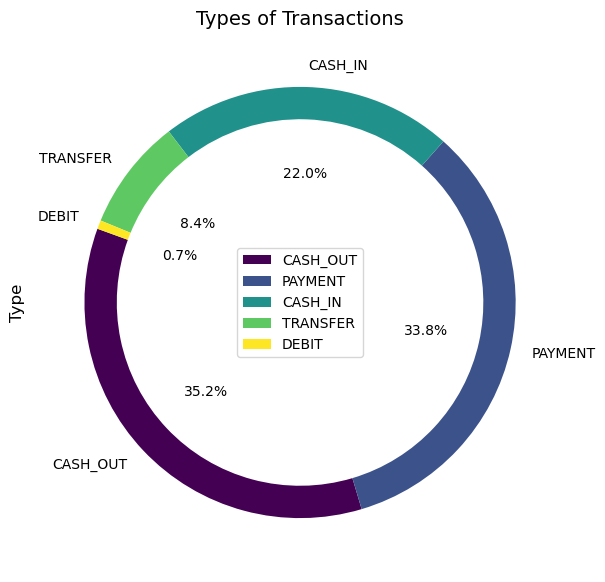

In [9]:
paper = plt.figure(figsize=[15,7])
data['type'].value_counts().plot.pie(fontsize=10, autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       startangle=160, cmap='viridis')
plt.title('Types of Transactions', size = 14)
plt.ylabel('Type', size = 12)
plt.legend(loc='center')
plt.show()

- We see that in the dataset majority of transactions are of type **CASH_OUT (35.2%)** followed by **PAYMENT (33.8%)**, **CASH_IN (22%)**, **TRANSFER (8.4%)**, and **DEBIT (0.7%)**.

#### Q2. What were the transaction types when fraud was committed?

In [10]:
data['type'][data['isFraud'] == 1].value_counts()

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

- We see that the Fraudulent transactions mainly belong either to the **CASH_OUT** category or to the **TRANSFER** category.
- This makes sense because, as the data dictionary mentions, the agents carrying the fraudulent transactions first transfer the money to an account and then cash it out.

#### Q3. What were the type of transactions that were flagged as fraud by the system?

In [11]:
data['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [12]:
data['type'][data['isFlaggedFraud'] == 1].value_counts()

TRANSFER    16
Name: type, dtype: int64

- We see that there are in total **16** transactions that have been flagged as fraud. And all **16** of those transactions were of type **TRANSFER**

#### Q4. Minimum and Maximum amount transferred for flagged transactions.

In [13]:
min_amt_flag = data['amount'][data['isFlaggedFraud'] == 1].min()
max_amt_flag = data['amount'][data['isFlaggedFraud'] == 1].max()

min_amt_nflag = data['amount'][data['isFlaggedFraud'] == 0].min()
max_amt_nflag = data['amount'][data['isFlaggedFraud'] == 0].max()

print(f"Minimum amount transferred when 'isflagged' is set {min_amt_flag}")
print(f"Maximum amount transferred when 'isflagged' is set {max_amt_flag}\n")

print(f"Minimum amount transferred when 'isflagged' is not set {min_amt_flag}")
print(f"Maximum amount transferred when 'isflagged' is not set {max_amt_flag}")

Minimum amount transferred when 'isflagged' is set 353874.22
Maximum amount transferred when 'isflagged' is set 10000000.0

Minimum amount transferred when 'isflagged' is not set 353874.22
Maximum amount transferred when 'isflagged' is not set 10000000.0


- We see that the minimum amount that was transferred when 'isflagged' was set is **353874.22**, whereas the maximum amount that was transferred is **10000000.0**.
- According to the data dictionary, transactions were flagged when the amount was greater than **<u>200000</u>**. But we see that the minimum amount for the transactions that were not flagged is **<u>353874.22</u>** (which is greater than 200000, and should have been flagged). This suggests that there is inconsistency when it comes to which transactions get flagged and which don't.

In [14]:
data[['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']][data['isFlaggedFraud'] == 1]

,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
2736446,4953893.08,4953893.08,0.0,0.0
3247297,1343002.08,1343002.08,0.0,0.0
3760288,536624.41,536624.41,0.0,0.0
5563713,4892193.09,4892193.09,0.0,0.0
5996407,19585040.37,19585040.37,0.0,0.0
5996409,19585040.37,19585040.37,0.0,0.0
6168499,3576297.10,3576297.10,0.0,0.0
6205439,353874.22,353874.22,0.0,0.0
6266413,2542664.27,2542664.27,0.0,0.0
6281482,10399045.08,10399045.08,0.0,0.0


- We see that out of all the transactions that were flagged, the values of newbalance and oldbalance are the same for both origin accounts and destination accounts.

In [15]:
data[(data['type'] == 'TRANSFER') & (data['isFlaggedFraud']==0) & \
     (data['oldbalanceDest'] == 0) & (data['newbalanceDest'] == 0)].count()

step              4158
type              4158
amount            4158
nameOrig          4158
oldbalanceOrg     4158
newbalanceOrig    4158
nameDest          4158
oldbalanceDest    4158
newbalanceDest    4158
isFraud           4158
isFlaggedFraud    4158
dtype: int64

- We see that there are 4158 transaction which are of the type **TRANSFER**, where **oldbalanceDest** and **newbalanceDest** are zero, yet these transactions haven't been flagged as Frauds.
- This points out more inconsistency in the way transaction are flagged.
- Since only 16 transactions were flagged as fraud and given how inconsistent the criteria for flagging is, we can drop this column from our analysis.

#### Q5. Analysis of data according to the time.

- To better understand how the transactions were carried out during the day, we will create a new feature from the **step** feature called **hour_of_day**.
- We will use this new feature to understand how the transactions varied according to the time.

In [16]:
data['hour_of_day'] = data['step']%24

In [17]:
fraud_df = data[data['isFraud'] == 1]

In [18]:
hourly_fraud_data = fraud_df.groupby('hour_of_day').size()

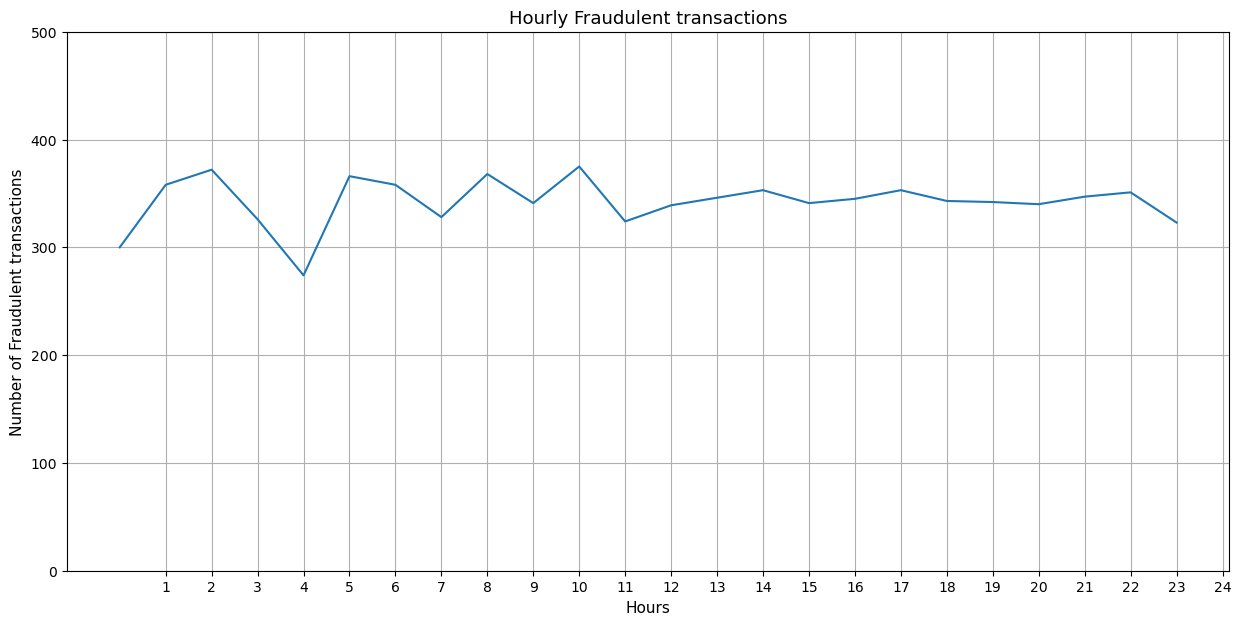

In [19]:
paper = plt.figure(figsize=[15,7])
sns.lineplot(x=hourly_fraud_data.index,  y=hourly_fraud_data.values)
plt.title("Hourly Fraudulent transactions", size=13)
plt.xlabel("Hours", size=11)
plt.ylabel("Number of Fraudulent transactions", size = 11)
plt.yticks(range(0, 510, 100))
plt.xticks(range(1,25,1))
plt.grid(visible=True)
plt.show()

- We see that most of the fraudulent transactions were carried out during the day.

In [20]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour_of_day
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1


#### Q7. Check to see if fraudulent transactions were carried out from the same account multiple times.

In [21]:
fraud_df = data[data['isFraud'] == 1]
notfraud_df = data[data['isFraud'] == 0]


print(fraud_df.shape)
print(fraud_df['nameOrig'].nunique())

(8213, 12)
8213


- We see that no two fraudulent transactions were carried out from the same account.
- We will now see if the accounts used for fraudulent transactions were used were used for non-fraudulent transactions or not.

In [22]:
print(f"Were any non-fraudulent transactions conducted from fraudulent accounts: \
 {fraud_df['nameOrig'].isin(pd.concat([notfraud_df['nameOrig'], notfraud_df['nameDest']])).any()}")

Were any non-fraudulent transactions conducted from fraudulent accounts:  True


- Some of the accounts that were used for fraudulent transactions were also used for non-fraudulent transactions.

#### Q8. Were any merchant accounts involved in Fraudulent transaction?

In [23]:
def m_acc(name):
    return re.findall('^M', name)

t_val = fraud_df['nameOrig'].apply(m_acc).any()
print(t_val)

False


- We see that none of the fraudulent transaction were carried out by Merchant accounts

In [24]:
def m_acc(name):
    return re.findall('^M', name)

t_val = fraud_df['nameDest'].apply(m_acc).any()
print(t_val)

False


- Merchant accounts were not in the receivers of fraudulent transactions either.

#### Q9. Were destinations of fraudulent transfers originators of fraudulent cash outs?

In [25]:
transfers = fraud_df[fraud_df['type'] == 'TRANSFER']
cash_outs = fraud_df[fraud_df['type'] == 'CASH_OUT']

transfers['nameDest'].isin(cash_outs['nameOrig']).any()

False

- We see that none of the destinations of the fraudulent transfers were originators of fraudulent cash_outs.

In [26]:
transfers = fraud_df[fraud_df['type'] == 'TRANSFER']
n_cash_outs = notfraud_df[notfraud_df['type'] == 'CASH_OUT']

transfers[transfers['nameDest'].isin(n_cash_outs['nameOrig'])]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour_of_day
1030443,65,TRANSFER,1282971.57,C1175896731,1282971.57,0.0,C1714931087,0.0,0.0,1,0,17
6039814,486,TRANSFER,214793.32,C2140495649,214793.32,0.0,C423543548,0.0,0.0,1,0,6
6362556,738,TRANSFER,814689.88,C2029041842,814689.88,0.0,C1023330867,0.0,0.0,1,0,18


- But we see that the destinations of fraudulent transfers were originators of genuine cash_outs.
- Let's look at the transactions of one of the accounts in detail.

In [27]:
data[(data['nameOrig'] == 'C423543548') | (data['nameDest'] == 'C423543548')]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour_of_day
2186261,185,CASH_OUT,214555.85,C423543548,0.00,0.0,C1066927674,4575179.83,4789735.69,0,0,17
6039814,486,TRANSFER,214793.32,C2140495649,214793.32,0.0,C423543548,0.00,0.00,1,0,6


- We see that the account **C423543548** received a **TRANSFER** at step **486**, but the cashout from the same account was at step **185**.
- This doesn't make sense because the way frauds were carried out were by transferring the amount to an account and then cash it out. But according to the above result, the cash_out was initiated before the transfer.
- Because of this inconsistency we can drop the **nameOrig** and **nameDest** columns.

<a name=Section5></a>
# **5. Applying Decision Tree Classifier**

<a name=Section51></a>
#### **5.1 Data Preparation**

##### Removing columns

- Removing the columns **nameOrig**, **nameDest**, and **isFlaggedFraud**.
- We will also remove **step** since we have already created the column **hour_of_day** using the same.

In [28]:
fin_data = data.drop(labels=['step','nameOrig', 'nameDest', 'isFlaggedFraud'], axis = 1)

##### Splitting the data into x and y.

In [29]:
x = fin_data.drop(['isFraud'], axis = 1)
y = fin_data['isFraud']

In [30]:
x.shape

(6362620, 7)

In [31]:
y.shape

(6362620,)

##### Encoding

In [32]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            object 
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   hour_of_day     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 339.8+ MB


In [33]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 6362620 entries, 0 to 6362619
Series name: isFraud
Non-Null Count    Dtype
--------------    -----
6362620 non-null  int64
dtypes: int64(1)
memory usage: 48.5 MB


- We see that the column **type** is of type **object**. We will need to encode the values of this column before we train the model.
- We will use one encoding to encode the values.

In [34]:
x = pd.get_dummies(data=x, columns=['type'], drop_first=True)

In [35]:
x.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,hour_of_day,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.0,160296.36,0.0,0.0,1,0,0,1,0
1,1864.28,21249.0,19384.72,0.0,0.0,1,0,0,1,0
2,181.00,181.0,0.00,0.0,0.0,1,0,0,0,1
3,181.00,181.0,0.00,21182.0,0.0,1,1,0,0,0
4,11668.14,41554.0,29885.86,0.0,0.0,1,0,0,1,0


##### Splitting into x_train, x_test, y_train, and y_test

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [37]:
x_train.shape

(5090096, 10)

In [38]:
x_test.shape

(1272524, 10)

In [39]:
y_train.shape

(5090096,)

In [40]:
y_test.shape

(1272524,)

<a name=Section52></a>
#### **5.2 Implementing the Model**

In [41]:
alg = DecisionTreeClassifier(random_state=42)
# fitting the algorithm on training data
alg.fit(x_train, y_train)

train_pred = alg.predict(x_train)
test_pred = alg.predict(x_test)

<a name=Section53></a>
#### **5.3 Model Evaluation**

In [42]:
test_report = classification_report(y_true=y_test, y_pred=test_pred)
print(test_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270884
           1       0.89      0.89      0.89      1640

    accuracy                           1.00   1272524
   macro avg       0.95      0.94      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



- We see that the model is able to classify a transaction as fraud or not with an f1-score of 1.00 for class 0 and an f1-score of 0.89 for class 1.

<a name=Section54></a>
#### **5.4 Feature Importance**

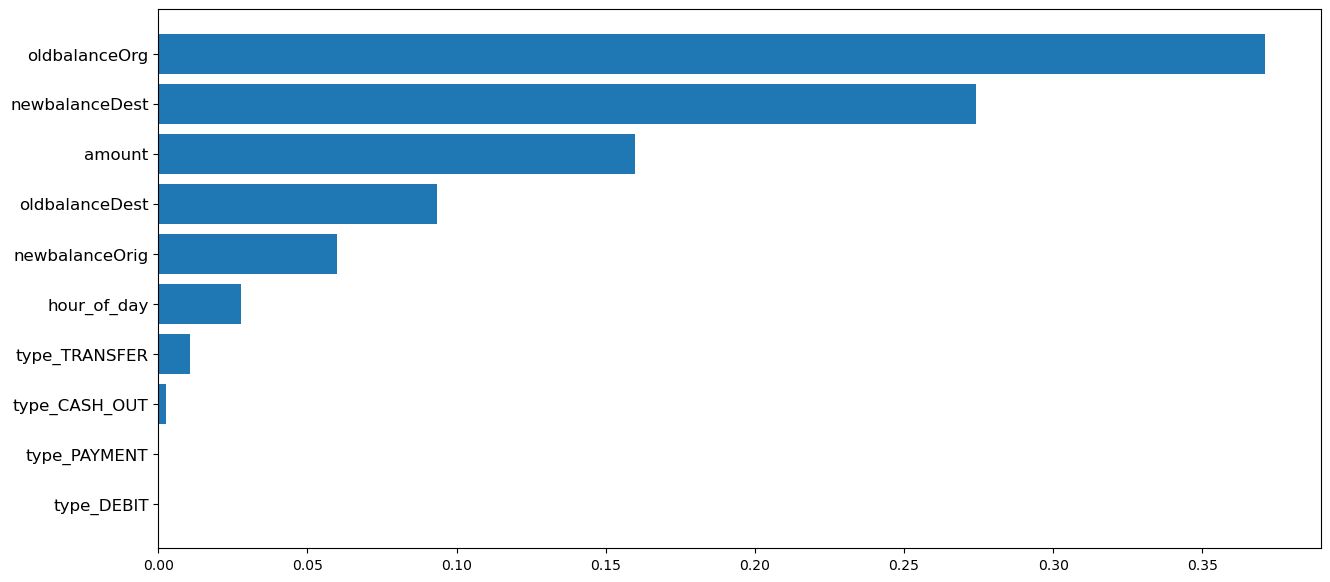

In [43]:
features = x_train.columns
importances = alg.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=[15, 7])
plt.barh(y=range(len(indices)), width=importances[indices], align='center')
plt.yticks(ticks=range(len(indices)), labels=[features[i] for i in indices], size=12)
plt.show()

- The most important features for classifying a transaction as Fraud or not are **oldbalanceOrg**, followed by **newbalanceDest**, **amount**, and so on.

<a name=Section6></a>
#### **6. Conclusion**

- The dataset used was a synthetic dataset generated using the PaySim Simulator.
- There were 6362620 records and 11 features.
- The classification of a transaction being fraud or not was carried out using the Decision Tree classifier. The classifier was able to classify with a f1-score of 1.00 for Class-0 (Not Fraud) and a f1-score of 0.89 for Class-1 (Fraud)